In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from ftpr.entities import Phase
from ftpr.dataloader import load_phases
import numpy as np
import os

### Set Variables

In [6]:
phases_dir = os.path.join('..', 'data', 'team_phases')
team1 = 'Manchester City'
team2 = 'West Bromwich Albion'
compact_limit = 25

In [7]:
df1 = pd.read_csv(os.path.join(phases_dir, f'{team1}.csv'))
phases1 = load_phases(df1, filter_static_events=False, min_phase_length=1, n_jobs=5)

df2 = pd.read_csv(os.path.join(phases_dir, f'{team2}.csv'))
phases2 = load_phases(df2, filter_static_events=True, min_phase_length=1, n_jobs=5)

In [8]:
print(f'Total Num Phases of {team1}', len(phases1))
print(f'Total Num Phases of {team2}', len(phases2))

Total Num Phases of Manchester City 8127
Total Num Phases of West Bromwich Albion 8190


### Calculating The Histogram of Phase Lengths

In [9]:
lenghts1 = dict()
current_len = 0
max_len = -1
for phase in phases1:
	current_len = len(phase)
	count = lenghts1.get(current_len, 0) + 1
	lenghts1[current_len] = count
	if current_len > max_len:
		max_len = current_len
	current_len = 1

print(lenghts1)

{2: 1207, 1: 3115, 23: 38, 4: 539, 11: 127, 9: 206, 3: 670, 36: 4, 7: 259, 5: 391, 10: 170, 21: 31, 8: 198, 12: 113, 16: 68, 14: 74, 20: 39, 6: 311, 17: 52, 13: 91, 28: 20, 31: 15, 15: 65, 24: 31, 26: 25, 25: 27, 39: 5, 40: 10, 19: 42, 27: 20, 18: 39, 34: 6, 29: 16, 41: 2, 43: 3, 22: 29, 30: 14, 33: 8, 32: 9, 54: 1, 38: 5, 63: 2, 55: 1, 45: 1, 48: 1, 57: 1, 37: 6, 50: 2, 49: 3, 51: 2, 44: 3, 35: 5, 56: 1, 47: 1, 87: 1, 46: 1, 42: 1}


In [10]:
lenghts2 = dict()
current_len = 0
max_len = -1
for phase in phases2:
	current_len = len(phase)
	count = lenghts2.get(current_len, 0) + 1
	lenghts2[current_len] = count
	if current_len > max_len:
		max_len = current_len
	current_len = 1

print(lenghts2)

{15: 32, 8: 163, 2: 1563, 1: 3472, 25: 5, 3: 862, 4: 593, 7: 241, 5: 401, 12: 59, 6: 298, 11: 83, 9: 140, 10: 79, 16: 30, 17: 15, 29: 3, 30: 1, 23: 2, 14: 42, 24: 6, 21: 12, 22: 9, 13: 47, 26: 2, 28: 1, 31: 1, 18: 12, 35: 1, 20: 8, 19: 7}


### Plotting The Comparative Histogram

/var/folders/tv/_qfcls8d76jd1sp6y_8qsd700000gn/T/ipykernel_12111/3053022568.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


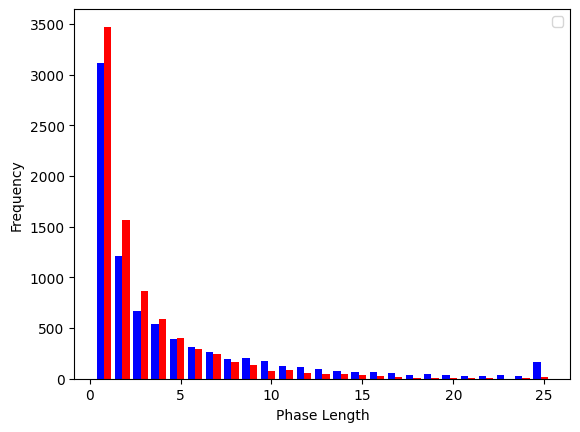

In [13]:
xs1 = [i for i in range(1, compact_limit + 1)]
ys1 = [lenghts1[i] for i in range(1, compact_limit)]
more25_count1 = 0
for i in range(compact_limit, max_len + 1):
    more25_count1 += lenghts1.get(i, 0)
ys1.append(more25_count1)

xs2 = [i for i in range(1, compact_limit + 1)]
ys2 = [lenghts2[i] for i in range(1, compact_limit)]
more25_count2 = 0
for i in range(compact_limit, max_len + 1):
    more25_count2 += lenghts2.get(i, 0)
ys2.append(more25_count2)

fig = plt.figure()
plt.bar(np.array(xs1) - 0.4, ys1, width=0.4, color='b', align='center')
plt.bar(np.array(xs2), ys2, width=0.4, color='r', align='center')
plt.xlabel('Phase Length')
plt.ylabel('Frequency')
fig.savefig('ComparePhases.png')

### Plotting The Histogram of Team 1

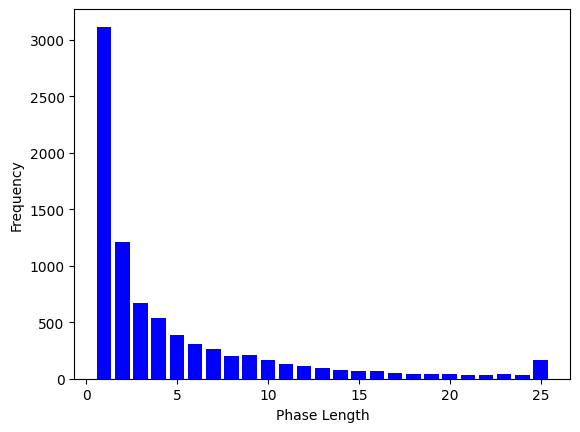

In [12]:
xs1 = [i for i in range(1, compact_limit + 1)]
ys1 = [lenghts1[i] for i in range(1, compact_limit)]
more25_count1 = 0
for i in range(compact_limit, max_len + 1):
    more25_count1 += lenghts1.get(i, 0)
ys1.append(more25_count1)

fig = plt.figure()
plt.bar(np.array(xs1), ys1, color='b', align='center')
plt.xlabel('Phase Length')
plt.ylabel('Frequency')
fig.savefig('Phases.png')